# About this file

Notes on [realpython.com](https://www.realpython.com) page: [Logistic regression in Python](https://realpython.com/logistic-regression-python/).

Logistic regression, despite its name, is a linear model for **classification** rather than regression. 

The nature of the dependent variables differentiates regression and classification problems. **Regression** problems have *continuous* and usually unbounded outputs. An example is when you’re estimating the salary as a function of experience and education level. On the other hand, **classification** problems have *discrete* and finite outputs called classes or categories. For example, predicting if an employee is going to be promoted or not (true or false) is a classification problem.

Regression -> continuous

Classification -> discrete

There are two main types of classification problems:

1. Binary or binomial classification: exactly two classes to choose between (usually 0 and 1, true and false, or positive and negative)
2. Multiclass or multinomial classification: three or more classes of the outputs to choose from

Logistic regression is a fundamental classification technique. It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression. Logistic regression is fast and relatively uncomplicated, and it’s convenient for you to interpret the results. Although it’s essentially a method for binary classification, it can also be applied to multiclass problems.

In [84]:
# imports, Python core
import math

# imports, Python packages
import matplotlib.pyplot as plt
import numpy as np

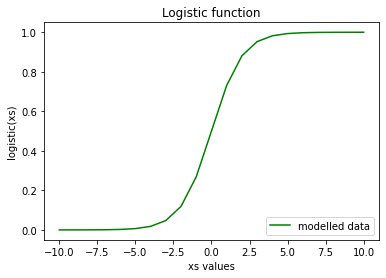

In [88]:
# The sigmoid function has values very close to either 0 or 1 across most of its domain. 
# This fact makes it suitable for application in classification methods.

def logistic(x: float) -> float:
    """returns the logistic function
    that is a form of sigmoid function, a S-shaped curve"""
    import math
    sigma = 1 / (1 + math.exp(-x))
    return sigma

# data
xs = [x_i for x_i in range(-10, 11)]
ys = [logistic(x) for x in xs]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(xs, ys, 'g-', label='modelled data')          # green solid line

# labels, title and show
plt.legend(loc='lower right')       # loc=49 means "lower right"
plt.xlabel("xs values")
plt.ylabel("logistic(xs)")
plt.title("Logistic function")
plt.show()


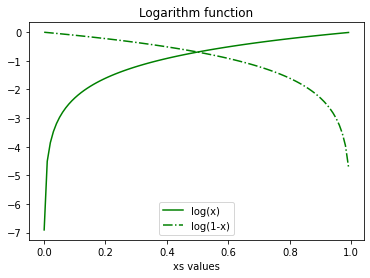

In [86]:
# the natural logarithm log(𝑥) of some variable 𝑥, for values of 𝑥 between 0 and 1
# As 𝑥 approaches zero, the natural logarithm of 𝑥 drops towards negative infinity. 
# When 𝑥 = 1, log(𝑥) is 0. The opposite is true for log(1 − 𝑥).

def natural_logarithm(x: float) -> float:
    import math
    return math.log(x)


# data
xs = [(x_i/100)+0.001 for x_i in range(0, 100, 1)]
ys1 = [natural_logarithm(x) for x in xs]
ys2 = [natural_logarithm(1-x) for x in xs]


# create a line chart, years on x-axis, gdp on y-axis
plt.plot(xs, ys1, 'g-', label='log(x)')          # green solid line
plt.plot(xs, ys2, 'g-.', label='log(1-x)')          # green dashed line


# labels, title and show
plt.legend(loc='lower center')       # loc=8 means "lower center"
plt.xlabel("xs values")
#plt.ylabel("logistic(xs)")
plt.title("Logarithm function")
plt.show()


Your goal is to find the logistic regression function 𝑝(𝐱) such that the predicted responses 𝑝(𝐱ᵢ) are as close as possible to the actual response 𝑦ᵢ for each observation 𝑖 = 1, …, 𝑛. Remember that the actual response can be only 0 or 1 in binary classification problems! This means that each 𝑝(𝐱ᵢ) should be close to either 0 or 1. That’s why it’s convenient to use the sigmoid function.

Once you have the logistic regression function 𝑝(𝐱), you can use it to predict the outputs for new and unseen inputs, assuming that the underlying mathematical dependence is unchanged.

The logistic regression function 𝑝(𝐱) is the sigmoid function of 𝑓(𝐱): 𝑝(𝐱) = 1 / (1 + exp(−𝑓(𝐱)). As such, it’s often close to either 0 or 1. The function 𝑝(𝐱) is often interpreted as the predicted probability that the output for a given 𝐱 is equal to 1. Therefore, 1 − 𝑝(𝑥) is the probability that the output is 0.

Logistic regression determines the best predicted weights 𝑏₀, 𝑏₁, …, 𝑏ᵣ such that the function 𝑝(𝐱) is as close as possible to all actual responses 𝑦ᵢ, 𝑖 = 1, …, 𝑛, where 𝑛 is the number of observations. The process of calculating the best weights using available observations is called model training or fitting.

To get the best weights, you usually maximize the log-likelihood function (LLF) for all observations 𝑖 = 1, …, 𝑛. This method is called the maximum likelihood estimation and is represented by the equation LLF = Σᵢ(𝑦ᵢ log(𝑝(𝐱ᵢ)) + (1 − 𝑦ᵢ) log(1 − 𝑝(𝐱ᵢ))).

## single-variate binary classification

The first example is related to a single-variate binary classification problem. This is the most straightforward kind of classification problem. There are several general steps you’ll take when you’re preparing your classification models:

1. Import packages, functions, and classes
2. Get data to work with and, if appropriate, transform it
3. Create a classification model and train (or fit) it with your existing data
4. Evaluate your model to see if its performance is satisfactory


array of distinct values that y takes:  [0 1]
intercept 𝑏₀ of the linear function 𝑓(x):  -1.046080667373841
slope 𝑏₁  of the linear function f(x):  0.5149137450395428
the model score is:  0.9


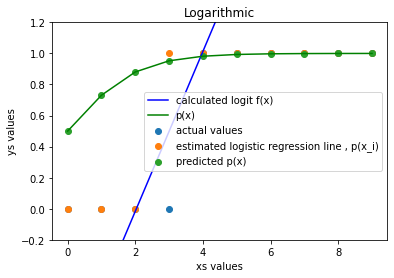

In [103]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# generate model and fit
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)


print('array of distinct values that y takes: ', model.classes_)
b_0 = model.intercept_[0]
b_1 = model.coef_[0][0]
print('intercept 𝑏₀ of the linear function 𝑓(x): ', b_0)
print('slope 𝑏₁  of the linear function f(x): ', b_1)

# f(x)
xs = x.tolist()
xr = [x[0] for x in x.tolist()] 
yc = [b_0 + b_1 * x for x in xr] 
#print('p(x) values of f(x) are: ', yc)

# p(x)
xr = xr
yp = [logistic(x) for x in xr]
#print(yp)

print('the model score is: ', model.score(x, y))

# generate scatter plot
plt.scatter(x, y, label='actual values')
# create a line chart of the logit f(x)
plt.plot(xr, yc, 'b-', label='calculated logit f(x)')
# generate scatter plot of the predictions
plt.scatter(x, model.predict(x), label='estimated logistic regression line , p(x_i)')
# create a line chart of the p(x)
plt.plot(xr, yp, 'g-', label='p(x)')
# create a line chart of the p(x)
plt.scatter(xr, yp, label='predicted p(x)')

# labels, title and show
plt.legend(loc='center right')       # loc=9 means "upper centre"
plt.ylim(-0.2, 15)
plt.ylim(-0.2, 1.2)
plt.xlabel("xs values")
plt.ylabel("ys values")
plt.title("Logarithmic")
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



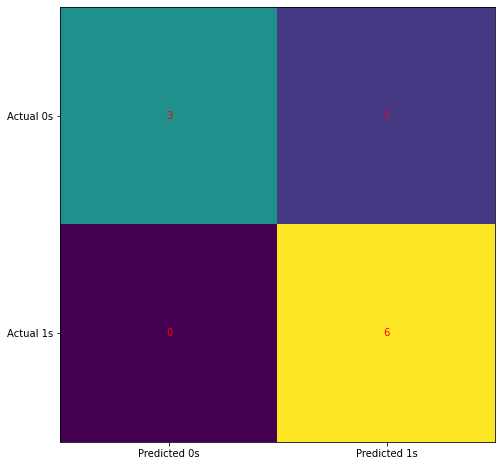

In [106]:
print(classification_report(y, model.predict(x)))

cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()